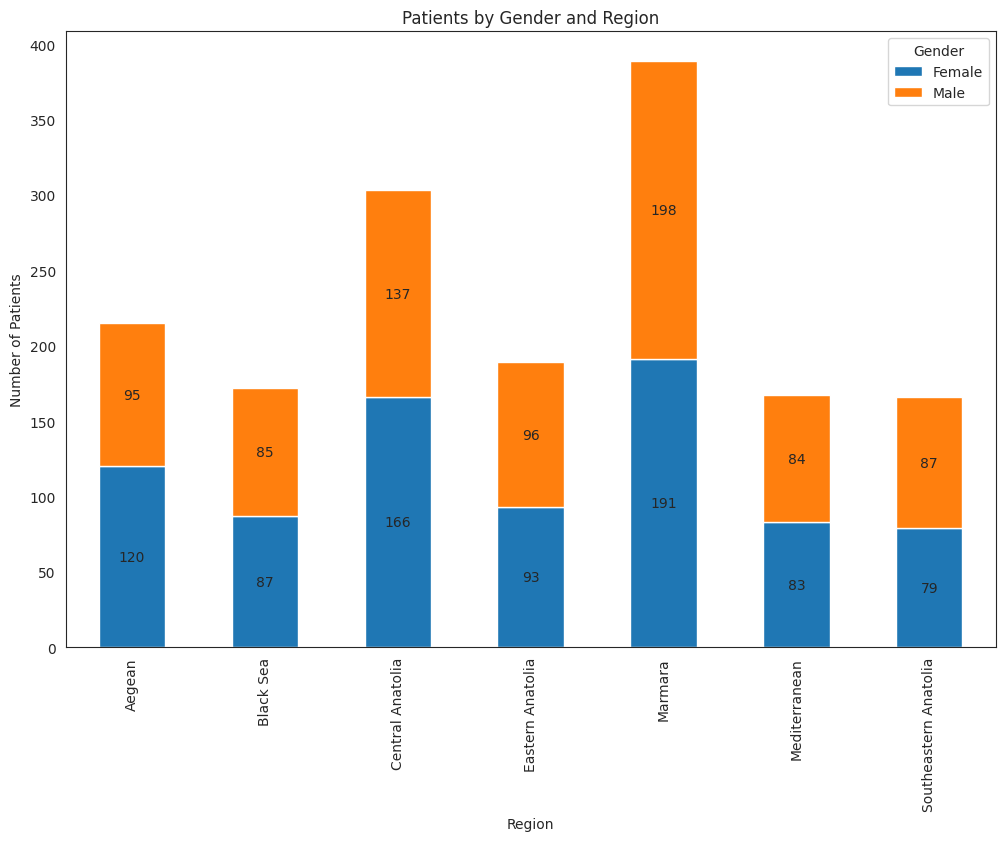

In [ ]:
from numpy import int64
import pandas as pd

# df = pd.read_csv('synthetic_healthcare_1700_dirty.csv', sep=',', header=None)

# sep used for separator
# header is used to see the total number of columns

df = pd.read_csv('synthetic_healthcare_1700_dirty.csv', sep=',')

# df.info()
# Examines the variable & data type

# df.dtypes
# Examines the data type

# df.head()
# Checks the first few rows of dataset

# df.tail()
# checks the last few rows of dataset


# All column headers are variable name. Not values.

# Multiple variables are NOT stored in a single column

# df.columns
# To see column names

df.columns = (df.columns.str.strip().str.lower().str.replace(r"[_-]",' ', regex=True).str.title())

# Removed unnecessary white spaces, made everything lower case, replaced unnecessary character, made the first letter of each word capital


df = df.rename(columns={'Patient Id': 'Patient ID','Regi0N': 'Region','Diagnosis Grp': 'Diagnosis Group','Comorbidityscore': 'Comorbidity Score', 'Bmi(Kg/M2)': 'BMI (kg/m^2)', 'Systolicbp': 'Systolic BP', 'Cholesterol Mg/Dl': 'Cholesterol (mg/dL)', 'Length Of Stay(Days)': 'Length of Stay (Days)', 'Total Cost (Try)': 'Total Cost (TRY)', 'Readmitted 30D': 'Readmitted (30 Days)'})
# Renamed columns

df['Patient ID'] = df['Patient ID'].str.strip() # Removed unnecessary spaces

lengths = df["Patient ID"].dropna().astype(str).str.len()

lengths.unique() # Check unique values

df.isnull().sum() # Checking for null values


df = df.astype({
    'Patient ID': 'string', # Conversion to String type from Object
    'Year': 'Int64', # Conversion to Int type from Float
})

# df.info()

df.isnull().sum() # Check for total null values

year_mean = round(df['Year'].mean())

df['Year'] = df['Year'].fillna(year_mean)

df["Year"].isnull().sum() # Total null values for this row is now 0

df['Year'].unique() # Check unique values

df.isnull().sum()

# df.head()

df.isnull().sum()

df['Age'] = pd.to_numeric(df['Age'], errors='coerce') # Converting non-null values to NA

# df.info()

df = df.astype({
    'Age': 'Int64', # Conversion to Int type from Float
})

age_median = round(df['Age'].median())

df['Age'] = df['Age'].fillna(age_median)

# df.info()

ageValues = df['Age'].unique()

# print(ageValues)

ageWithinRange = (ageValues >= 18) & (ageValues <= 95) # Checking if all values falls within the range

# print(ageWithinRange)

df.isnull().sum()

# df.info()

df.isnull().sum()

df.head()


df['Gender'] = df['Gender'].str.strip().str.lower().str.title()


# df.info()

df.head()

df['Gender'].unique() # ['Male', 'Female', 'Mal?', 'Femal?', <NA>, 'Male*']

df['Gender'] = df['Gender'].replace(['Mal?', 'Femal?', 'Male*'], ['Male', 'Female', 'Male'])

df['Gender'].unique() # ['Female', 'Male', <NA>]

df= df.dropna(subset=['Gender'])

from pandas.api.types import CategoricalDtype

gender_type = CategoricalDtype(
    categories=["Male", "Female"],
    ordered=True
)

df["Gender"] = df["Gender"].astype(gender_type)

df.isnull().sum()

df['Region'] = df['Region'].str.strip().str.lower().str.title()

df['Region'].unique()

df= df.dropna(subset=['Region'])

df.isnull().sum()

df['Region'].unique()

# ['Southeastern Anatolia',      'Central Anatolia',                'Aegean',
#       'Eastern Anatolia',               'Marmara', 'Southeastern Anatoli?',
#          'Mediterranean',             'Black Sea',         'Med1Terranean',
#       'Central Anatoli?',     'Central Anatolia*',      'Central Anat0Lia',
#        'Easternanatolia', 'Southeastern Anatol1A',              'Marmara*',
#   'Southeasternanatolia',     'Eastern Anatolia*',      'Central Anatol1A']

toReplace = ['Central Anatoli?',
             'Easternanatolia',
             'Southeasternanatolia',
             'Central Anatolia*',
             'Southeastern Anatol1A',
             'Southeastern Anatoli?',
             'Med1Terranean',
             'Central Anat0Lia',
             'Marmara*',
             'Central Anatol1A',
             'Eastern Anatolia*']

toBeReplaced = ['Central Anatolia',
                'Eastern Anatolia',
                'Southeastern Anatolia',
                'Central Anatolia',
                'Southeastern Anatolia',
                'Southeastern Anatolia',
                'Mediterranean',
                'Central Anatolia',
                'Marmara',
                'Central Anatolia',
                'Eastern Anatolia']

df['Region'] = df['Region'].replace(toReplace, toBeReplaced)

df['Region'].unique()

region_type = CategoricalDtype(
    categories=['Southeastern Anatolia', 'Central Anatolia', 'Aegean',
       'Eastern Anatolia', 'Marmara', 'Mediterranean', 'Black Sea'],
    ordered=True
)

df['Region'] = df['Region'].astype(region_type)

df.isnull().sum()

# df.info()

df['Insurance Type'].unique()

df['Insurance Type'] = df['Insurance Type'].str.strip().str.lower().str.title()

df['Insurance Type'].unique()

df = df.dropna(subset=['Insurance Type'])

df['Insurance Type'].unique()

df['Insurance Type'] = df['Insurance Type'].replace(
    ['Pr1Vate','Privat?','Publi?', 'Publ1C','Public*'],
    ['Private','Private','Private', 'Public', 'Public'])

df['Insurance Type'].unique()

insurance_type  = CategoricalDtype(
    categories=["Public", "Private", "Uninsured"],
    ordered=True
)

df["Insurance Type"] = df["Insurance Type"].astype(insurance_type)

# df.info()

df.isnull().sum()

df['Admission Type'].unique()

df = df.dropna(subset=['Admission Type'])

df.isnull().sum()

df['Admission Type'] = df['Admission Type'].str.strip().str.lower().str.title()

df['Admission Type'].unique()

# ['Emergency', 'Urgent', 'Referra?', 'Referral', 'Elective',
#        'Elective*', 'Referral*', 'Emergency*', 'Electiv?', 'Urgen?',
#        'Elect1Ve']

toReplace = ['Referra?',
             'Elective*',
             'Referral*',
             'Emergency*',
             'Electiv?',
             'Urgen?',
             'Elect1Ve']

toBeReplaced = ['Referral',
                'Elective',
                'Referral',
                'Emergency',
                'Elective',
                'Urgent',
                'Elective']

df['Admission Type'] = df['Admission Type'].replace(toReplace, toBeReplaced)

df['Admission Type'].unique()

admission_type   = CategoricalDtype(
    categories=['Emergency', 'Urgent', 'Referral', 'Elective'],
    ordered=True
)

df['Admission Type'] = df['Admission Type'].astype(admission_type)

# df.info()

df.isnull().sum()

df['Diagnosis Group'].unique()

df = df.dropna(subset=['Diagnosis Group'])

df.isnull().sum()

df['Diagnosis Group'] = df['Diagnosis Group'].str.strip().str.lower().str.title()

df['Diagnosis Group'].unique()

# ['Infectious Disease', 'Orthopedics', 'Cardiology', 'Endocrinology',
#        'Respiratory', 'Oncology', 'Neurology', 'Nephrology',
#        'Infect1Ous D1Sease', 'Respirat0Ry', 'Resp1Ratory',
#        'Endocrinolog?', 'Endocr1Nology', 'Cardiolog?', 'Nephrology*',
#        '0Nc0L0Gy', 'End0Crin0L0Gy', 'Infecti0Us Disease', 'Respiratory*',
#        'Infectious Disease*', 'Nephr0L0Gy']

toReplace = ['Infect1Ous D1Sease',
             'Respirat0Ry',
             'Resp1Ratory',
             'Endocrinolog?',
             'Endocr1Nology',
             'Cardiolog?',
             'Nephrology*',
             '0Nc0L0Gy',
             'End0Crin0L0Gy',
             'Infecti0Us Disease',
             'Respiratory*',
             'Infectious Disease*',
             'Nephr0L0Gy']

toBeReplaced = ['Infectious Disease',
                'Respiratory',
                'Respiratory',
                'Endocrinology',
                'Endocrinology',
                'Cardiology',
                'Nephrology',
                'Oncology',
                'Endocrinology',
                'Infectious Disease',
                'Respiratory',
                'Infectious Disease',
                'Nephrology',
                ]

df['Diagnosis Group'] = df['Diagnosis Group'].replace(toReplace, toBeReplaced)

df['Diagnosis Group'].unique()

diagnosis_group    = CategoricalDtype(
    categories=['Infectious Disease', 'Orthopedics', 'Cardiology', 'Endocrinology',
       'Respiratory', 'Oncology', 'Neurology', 'Nephrology'],
    ordered=True
)

df['Diagnosis Group'] = df['Diagnosis Group'].astype(diagnosis_group)

# df.info()

df.isnull().sum()

df['Comorbidity Score'].unique()

df['Comorbidity Score'] = df['Comorbidity Score'].astype('Int64')

# df.info()

df['Comorbidity Score'].unique()

comorbidity_score_mean = round(df['Comorbidity Score'].mean())

df['Comorbidity Score'] = df['Comorbidity Score'].fillna(comorbidity_score_mean)

df['Comorbidity Score'].unique()

df.isnull().sum()

# df.info()

bmiValues = df['BMI (kg/m^2)'].dropna().unique()

bmiWithinRange = (bmiValues >= 16.0) & (bmiValues <= 45.0) # Checking if all values falls within the range

# print(bmiWithinRange)

df.isnull().sum()

bmi_mean = df['BMI (kg/m^2)'].mean()

df['BMI (kg/m^2)'] = df['BMI (kg/m^2)'].fillna(bmi_mean)

bmiWithinRange = (bmiValues >= 16.0) & (bmiValues <= 45.0) # Checking if all values falls within the range

# print(bmiWithinRange)

# df.info()

df.isnull().sum()

# df.info()

sysBPValues = df['Systolic BP'].dropna().unique()

sysBPWithinRange = (sysBPValues >= 90) & (sysBPValues <= 210) # Checking if all values falls within the range

# print(sysBPWithinRange)

df.isnull().sum()

sysBP_mean = round(df['Systolic BP'].mean())

df['Systolic BP'] = df['Systolic BP'].fillna(sysBP_mean)

sysBPWithinRange = (sysBPValues >= 90) & (sysBPValues <= 210) # Checking if all values falls within the range

# print(sysBPWithinRange)

# df.info()

df.isnull().sum()

df['Systolic BP'] = df['Systolic BP'].astype('Int64')

# df.info()

df.isnull().sum()

cholesterolValues = df['Cholesterol (mg/dL)'].dropna().unique()

cholesterolWithinRange = (cholesterolValues >= 120) & (cholesterolValues <= 360) # Checking if all values falls within the range

# print(cholesterolWithinRange)


cholesterol_mean = round(df['Cholesterol (mg/dL)'].mean())

df['Cholesterol (mg/dL)'] = df['Cholesterol (mg/dL)'].fillna(cholesterol_mean)

df.isnull().sum()

df['Cholesterol (mg/dL)'] = df['Cholesterol (mg/dL)'].astype('Int64')

cholesterolWithinRange = (cholesterolValues >= 120) & (cholesterolValues <= 360) # Checking if all values falls within the range

# print(cholesterolWithinRange)

# df.info()

df.isnull().sum()


daysLength = df['Length of Stay (Days)'].dropna().unique()

daysInRange = (daysLength >= 1) & (daysLength <= 30) # Checking if all values falls within the range

# print(daysInRange)

df['Length of Stay (Days)'].unique()

len_of_stay_mode = df['Length of Stay (Days)'].mode()

df['Length of Stay (Days)'] = df['Length of Stay (Days)'].fillna(len_of_stay_mode[0])


df['Length of Stay (Days)'] = df['Length of Stay (Days)'].astype('Int64')

daysInRange = (daysLength >= 1) & (daysLength <= 30) # Checking if all values falls within the range

# print(daysInRange)

# df.info()

df.isnull().sum()

# df.info()

totalCost = df['Total Cost (TRY)'].dropna().unique()

totalCostWithinRange = (totalCost > 0) # Checking positive int values

# print(totalCostWithinRange)

totalCost_mode = df['Total Cost (TRY)'].mode()

df['Total Cost (TRY)'] = df['Total Cost (TRY)'].fillna(totalCost_mode[0])

df['Total Cost (TRY)'] = df['Total Cost (TRY)'].astype('Int64')

# df.info()

df.isnull().sum()

df['Discharge Status'].unique()

df['Discharge Status'] = df['Discharge Status'].str.strip().str.lower().str.title()

df['Discharge Status'].unique()

df = df.dropna(subset=['Discharge Status'])

df['Discharge Status'].unique()

toReplace =['Hom?',
            'Home*',
            'H0Me',
            'Decease?',
            'Transferre?']

toBeReplaced = ['Home',
                'Home',
                'Home',
                'Deceased',
                'Transferred']

df['Discharge Status'] = df['Discharge Status'].replace(toReplace, toBeReplaced)

df['Discharge Status'].unique()

discharge_status  = CategoricalDtype(
    categories=['Home', 'Deceased', 'Transferred'],
    ordered=True
)

df['Discharge Status'] = df['Discharge Status'].astype(discharge_status)

# df.info()

df.isnull().sum()

df['Readmitted (30 Days)'].unique()

df['Readmitted (30 Days)'] = df['Readmitted (30 Days)'].astype('Int64')

df['Readmitted (30 Days)'].unique()

import random

df['Readmitted (30 Days)'] = df['Readmitted (30 Days)'].fillna(random.randint(0, 1))

df['Readmitted (30 Days)'].unique()

# df.info()

# df.head()

df[df.duplicated()] # Check for duplicates

df = df.drop_duplicates() # Drop the duplicates

# df.info()

df.head()

df[df.duplicated()]

# df.describe() # Final check for max and min values

# df.info()

df.to_csv('synthetic_healthcare_1700_clean.csv', index=False)

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('synthetic_healthcare_1700_clean.csv', sep=',')

stackedBar = df.groupby(["Region", "Gender"]).size().unstack()
# Group by Region and Gender, count the occurrence and then unstack for plotting


# Stacked bar chart

chart = stackedBar.plot(
    kind="bar",
    stacked=True,
    figsize=(12,8) # Figure size of chart
)

# Adding labels
for c in chart.containers:
    chart.bar_label(c, label_type="center")

sns.set_style('white') # Background color to white

plt.title("Patients by Gender and Region") # Set the Title of the chart
plt.xlabel("Region") # Set label of the X-Axis
plt.ylabel("Number of Patients") # Set label of the Y-Axis
plt.show() # Build and show the plot
